In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [6]:
df=pd.read_csv(r"C:\Users\mouni\Downloads\heart-diseases datset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### missing values

In [7]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### duplicates value finding

In [11]:
dups=df.duplicated().sum()
print(f"duplicate rows:{dups}")
if dups>0:
    df=df.drop_duplicates()

duplicate rows:723


In [13]:
df.shape

(302, 14)

In [14]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3    

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

([<matplotlib.axis.XTick at 0x2228f502290>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

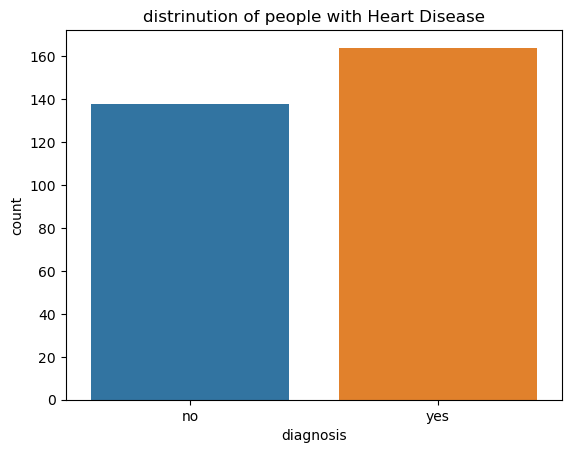

In [17]:
sns.countplot(x='target', data=df)
plt.title('distrinution of people with Heart Disease')
plt.xlabel('diagnosis')
plt.xticks(ticks=[0,1],labels=['no','yes'])

In [18]:
df.shape

(302, 14)

([<matplotlib.axis.XTick at 0x2228f561490>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

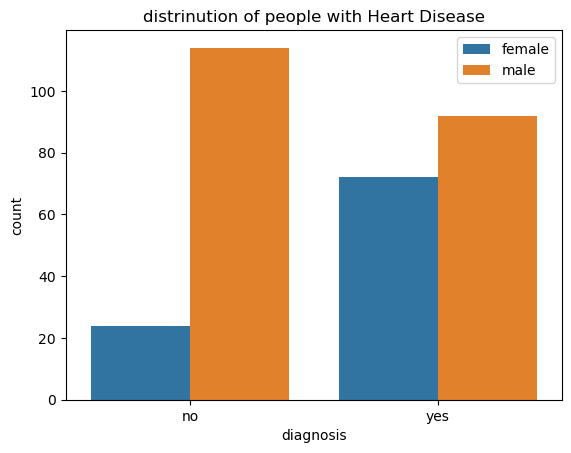

In [21]:
sns.countplot(x='target', data=df, hue='sex')
plt.legend(labels=['female','male'])
plt.title('distrinution of people with Heart Disease')
plt.xlabel('diagnosis')
plt.xticks(ticks=[0,1],labels=['no','yes'])

Text(0.5, 1.0, 'distrinution of age for patients with and without Heart Disease')

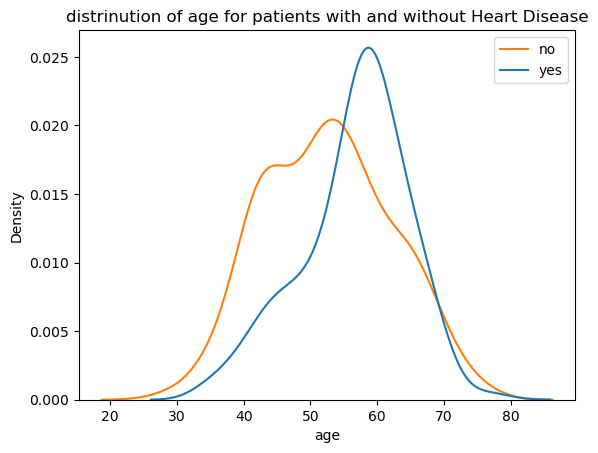

In [22]:
sns.kdeplot(x='age',data=df, hue='target')
plt.legend(labels=['no','yes'])
plt.title('distrinution of age for patients with and without Heart Disease')

In [34]:
# categorical columns
categorical_cols=[
    "cp","fbs","restecg",
    "exang","slope","ca","thal"
]
#numerical columns
numerical_cols=[
    "age","trestbps","chol",
    "thalach","oldpeak","sex"
    
]

### encoding

In [35]:
encoded_df= pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [45]:
print(encoded_df)

     age  sex  trestbps  chol  thalach  oldpeak  target   cp_1   cp_2   cp_3  \
0     52    1       125   212      168      1.0       0  False  False  False   
1     53    1       140   203      155      3.1       0  False  False  False   
2     70    1       145   174      125      2.6       0  False  False  False   
3     61    1       148   203      161      0.0       0  False  False  False   
4     62    0       138   294      106      1.9       0  False  False  False   
..   ...  ...       ...   ...      ...      ...     ...    ...    ...    ...   
723   68    0       120   211      115      1.5       1  False   True  False   
733   44    0       108   141      175      0.6       1  False   True  False   
739   52    1       128   255      161      0.0       0  False  False  False   
843   59    1       160   273      125      0.0       0  False  False   True   
878   54    1       120   188      113      1.4       0  False  False  False   

     ...  exang_1  slope_1  slope_2   c

In [46]:
 encoded_df.shape

(302, 23)

In [50]:
encoded_df.info

<bound method DataFrame.info of      age  sex  trestbps  chol  thalach  oldpeak  target   cp_1   cp_2   cp_3  \
0     52    1       125   212      168      1.0       0  False  False  False   
1     53    1       140   203      155      3.1       0  False  False  False   
2     70    1       145   174      125      2.6       0  False  False  False   
3     61    1       148   203      161      0.0       0  False  False  False   
4     62    0       138   294      106      1.9       0  False  False  False   
..   ...  ...       ...   ...      ...      ...     ...    ...    ...    ...   
723   68    0       120   211      115      1.5       1  False   True  False   
733   44    0       108   141      175      0.6       1  False   True  False   
739   52    1       128   255      161      0.0       0  False  False  False   
843   59    1       160   273      125      0.0       0  False  False   True   
878   54    1       120   188      113      1.4       0  False  False  False   

     ..

In [53]:
encoded_df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [54]:
encoded_df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [56]:
df.shape

(302, 14)

In [55]:
encoded_df.tail()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False
878,54,1,120,188,113,1.4,0,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [57]:
bool_cols = encoded_df.select_dtypes(include="bool").columns
encoded_df[bool_cols] = encoded_df[bool_cols].astype(int)
encoded_df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
